In [4]:
"""
Santosh Omprakash
"""

'\nSantosh Omprakash\n'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scikitplot as skplt

In [6]:
df = pd.read_csv('hotel_bookings.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

By looking at the values in the dataset, it can be seen that some columns have missing values. The columns where some values are missing are - 'children', 'country', 'agent', 'company'. The missing values will need be replaced. 

In [8]:
df.loc[:,['is_canceled','children','country', 'agent', 'company']].info()
df.country.fillna('-', inplace=True)
df.agent.fillna(0, inplace=True)
df.company.fillna(0, inplace=True)
df.children.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   is_canceled  119390 non-null  int64  
 1   children     119386 non-null  float64
 2   country      118902 non-null  object 
 3   agent        103050 non-null  float64
 4   company      6797 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.6+ MB


Text(0.5, 1.0, 'Cancelled or not cancelled')

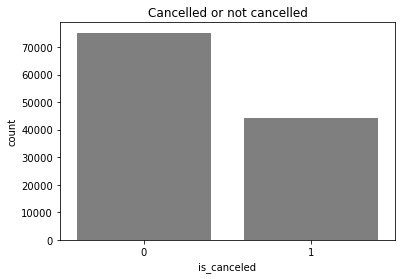

In [9]:
color=sns.color_palette()[7]
sns.countplot(data=df,x='is_canceled',color=color);
plt.title('Cancelled or not cancelled')

Text(0.5, 1.0, 'Hotel Type')

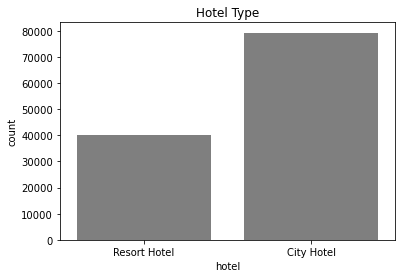

In [10]:
sns.countplot(data=df,x='hotel',color=color);
plt.title('Hotel Type')

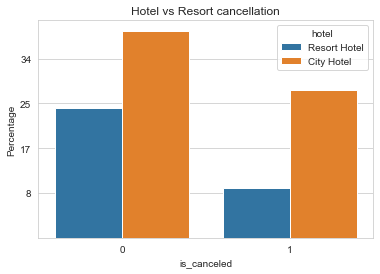

In [11]:
sns.set_style('whitegrid')
row=df.shape[0]
color=sns.color_palette()[0]
sns.countplot(data=df,x='is_canceled',hue='hotel');
#df.plot(kind='bar',stacked=True,legend=False)
plt.yticks([10000,20000,30000,40000],[8,17,25,34]);
plt.ylabel('Percentage');
plt.title('Hotel vs Resort cancellation');

In [12]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = df['arrival_date'].apply(pd.to_datetime)
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)

In [13]:
cancelled_data = df[df['reservation_status'] == 'Canceled']
cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days

<ipython-input-13-af4fd5b9988c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_data['canc_to_arrival_days'] = cancelled_data['arrival_date'] - cancelled_data['reservation_status_date']
<ipython-input-13-af4fd5b9988c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_data['canc_to_arrival_days'] = cancelled_data['canc_to_arrival_days'].dt.days


C:\Users\oneor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


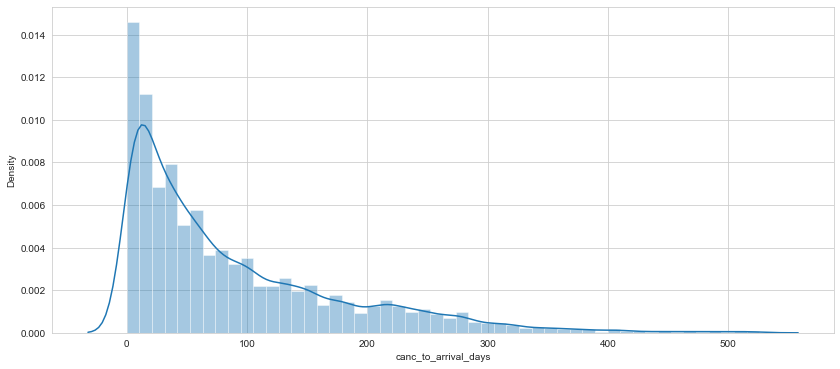

In [14]:
plt.figure(figsize=(14,6))
sns.distplot(cancelled_data['canc_to_arrival_days'])
plt.show()

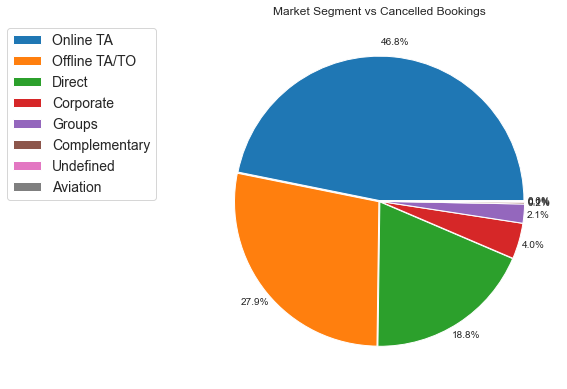

In [17]:
plt.figure(figsize=(8,8))
explode = [0.005] * len(cancelled_data['market_segment'].unique())
#colors = ['royalblue','orange','y','darkgreen','gray','purple','red','lightblue']
plt.pie(cancelled_data['market_segment'].value_counts(),
       autopct = '%.1f%%',
       explode = explode, pctdistance=1.1, labeldistance=1.2)
#       colors = colors)
plt.legend(cancelled_data['market_segment'].unique(), bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Market Segment vs Cancelled Bookings')
plt.tight_layout()
plt.show()

#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

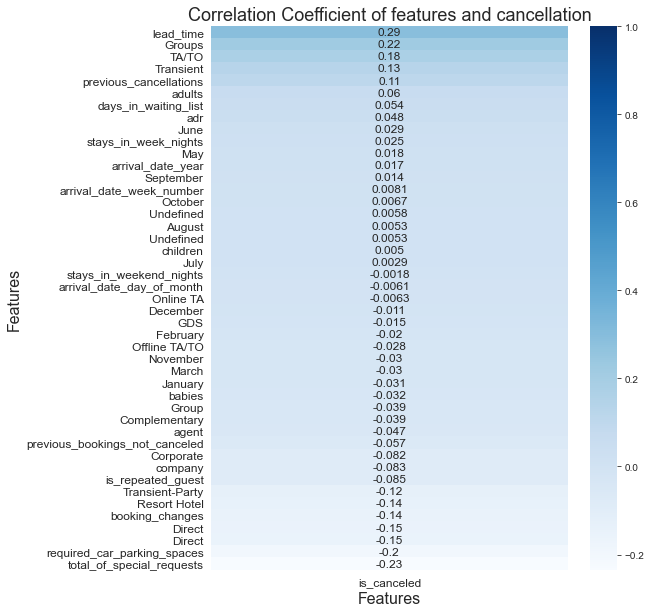

In [62]:
# Visualizing correlation of features and cancellation
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient of features and cancellation', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [18]:
df = df.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status',
              'reservation_status_date', 'arrival_date'], axis=1)
df = pd.concat([df, 
                 pd.get_dummies(df['hotel'], drop_first=True), 
                 pd.get_dummies(df['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(df['market_segment'], drop_first=True),
                 pd.get_dummies(df['distribution_channel'], drop_first=True),
                 pd.get_dummies(df['customer_type'], drop_first=True)
                 ], axis=1)
df = df.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

In [19]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Empty dictionary of model accuracy results
model_acc = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

In [22]:
# Baseline model
(unique, counts) = np.unique(y_train, return_counts=True)
if counts[0]  > counts[1]:
    idx = 0
else:
    idx = 1

# Applying baseline results to y_pred
if idx == 0:
    y_pred = np.zeros(y_test.shape)
else:
    y_pred = np.ones(y_test.shape)

# Computing accuracy
model_acc['Baseline'] = model_accuracy(y_test, y_pred)

In [23]:
# Fit and train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=250)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_acc['LogisticRegression'] = model_accuracy(y_test, y_pred)

In [24]:
# Fit and train
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_acc['KNearestNeighbors'] = model_accuracy(y_test, y_pred)

In [25]:
# Fit and train
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_acc['SVM'] = model_accuracy(y_test, y_pred)

In [26]:
# Fit and train
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

# Predict
y_pred = classifier.predict(X_test)

# Computing accuracy
model_acc['RandomForest'] = model_accuracy(y_test, y_pred)

In [27]:
# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,25,50,100,500] , 'criterion': ['entropy', 'gini']}]
randomforestclassifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = randomforestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'n_estimators': [10, 25, 50, 100, 500]}],
             scoring='accuracy')

In [28]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.87
Best Parameters:  {'criterion': 'gini', 'n_estimators': 100}


In [29]:
# Fit and train
optimized_classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
optimized_classifier.fit(X_train,y_train)

# Predict
y_pred = optimized_classifier.predict(X_test)

# Computing accuracy
model_acc['OptimizedRandomForest'] = model_accuracy(y_test, y_pred)

In [30]:
model_accuracies = pd.DataFrame(list(model_acc.values()), index=model_acc.keys(), columns=['Accuracy'])
model_accuracies

,Accuracy
Baseline,62.54
LogisticRegression,78.80
KNearestNeighbors,81.62
SVM,82.01
RandomForest,86.22
OptimizedRandomForest,87.26


Text(0.5, 0, 'Predicted label; 0 - Not cancelled; 1 - Cancelled')

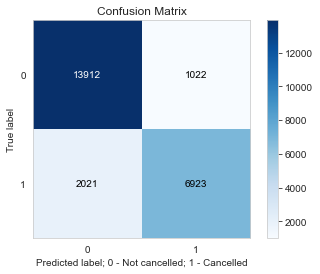

In [60]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xlabel('Predicted label; 0 - Not cancelled; 1 - Cancelled')

In [63]:
# True Positives:
TP = 6923
# True Negatives:
TN = 13912
# False Posititives: 
FP = 1022
# False Negatives: 
FN = 2021

sum_all = 6923+13912+1022+2021

print(f'Correctly classified: {np.round((TP+TN)/sum_all*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')

Correctly classified: 87.0%
Canceled bookings correctly classified: 77.0%
Not canceled bookings correctly classified: 93.0%
Bookings predicted canceled that are actually canceled: 87.0%
Bookings predicted not canceled that are actually not canceled: 87.0%
